[ 41.84688995 -81.14629199]
[-32.45881872  82.44103001]
[ 55.48774037 -79.47882477]
[-27.88366331  79.32964685]
[ 60.62795589 -77.20908391]
[[ 41.84688995 -81.14629199]
 [-32.45881872  82.44103001]
 [ 55.48774037 -79.47882477]
 [-27.88366331  79.32964685]
 [ 60.62795589 -77.20908391]]
iteration: 1
9406041.044415677
iteration: 2
6351857.44995841
iteration: 3
5551531.1266310625
iteration: 4
5410106.070109167
iteration: 5
5367451.277304922
iteration: 6
5351383.258617281
iteration: 7
5345603.82157773
iteration: 8
5342093.815878797
iteration: 9
5339153.761337918
iteration: 10
5333358.367215186
iteration: 11
5324350.077314794
iteration: 12
5313087.559965968
iteration: 13
5296336.265247125
iteration: 14
5271364.601064809
iteration: 15
5228186.071471524
iteration: 16
5132297.360523201
iteration: 17
4972561.088424371
iteration: 18
4771224.10644709
iteration: 19
4564841.71859823
iteration: 20
4394235.135878963
iteration: 21
4280658.086005121
iteration: 22
4227949.80996445
iteration: 23
4208754.7

<IPython.core.display.Javascript object>


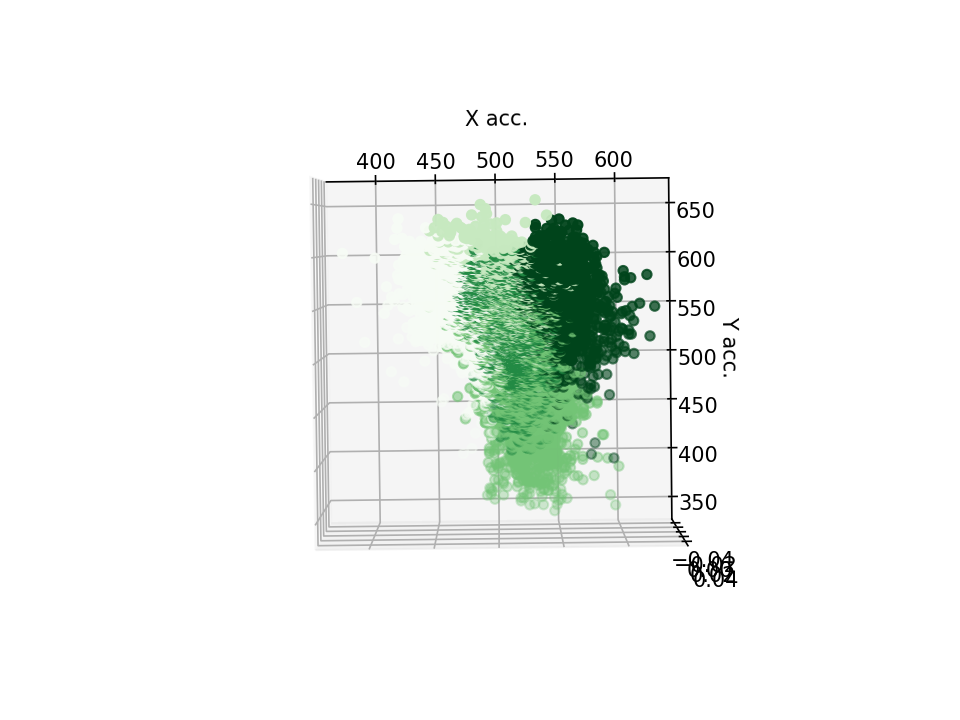

<IPython.core.display.Javascript object>


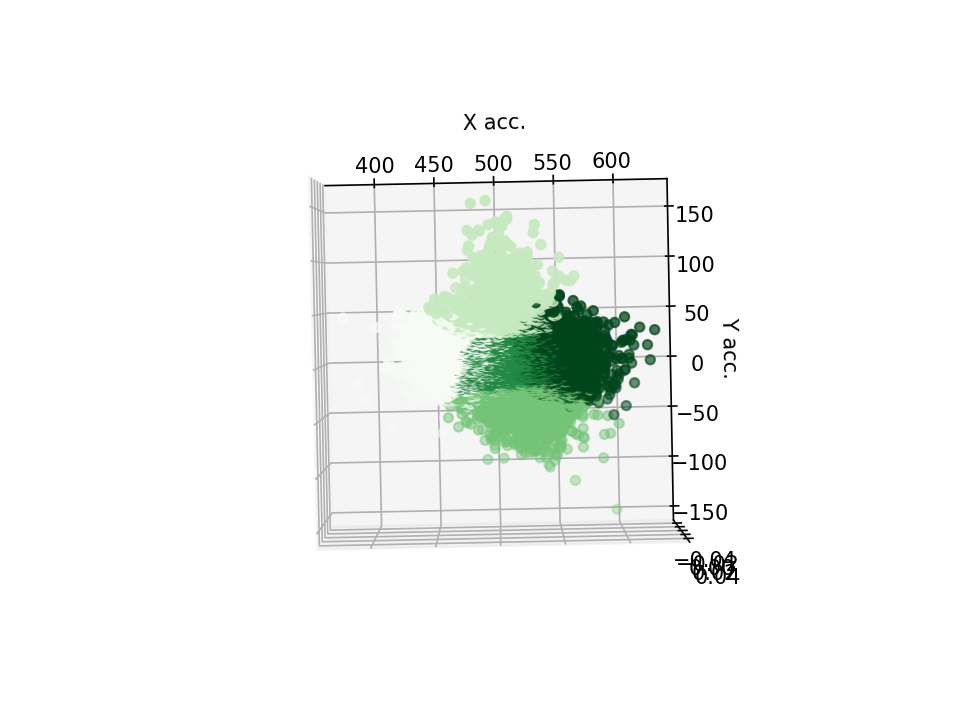

"\nnp.savetxt('Y_tr.txt', Y_tr)\nnp.savetxt('Y_tr_k_means.txt', Y_tr_k_means)\n\nX_tr = X_tr[:,3:]\nX_tr = X_tr/X_tr.max()\nsoftmax.train(X_tr, Y_tr, 3)\n"

In [4]:
from stanford_cs229.modeling.softmax import SoftmaxRegression
from stanford_cs229.modeling.k_means import KMeans
from stanford_cs229.utils.util import load_our_data, plot, preprocess_rolling_avg
from stanford_cs229.utils.csv_plotter_classifier import format_data

import numpy as np

import matplotlib.pyplot as plt
from importlib import reload
reload(plt)
%matplotlib notebook

softmax = SoftmaxRegression(lr=0.01, max_iter=1000)

X_tr = load_our_data('stanford_cs229/data/ydeskx_overhand_weight_4-60Hz.csv')

X_tr_prep = preprocess_rolling_avg(X_tr) # Preprocessed for k_means

Y_tr = format_data(X_tr)

k_means = KMeans(verbose=True)
Y_tr_k_means = k_means.assign(X_tr_prep,5,random=True) # Use hard-coded centroid initializations

print(Y_tr)
print(Y_tr_k_means)


fig1 = plt.figure(0)
ax1 = plt.axes(projection='3d')
#ax1.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr*40, cmap='Greens')
#ax1.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr*40, cmap='Greens')
ax1.scatter(X_tr[:,0], X_tr[:,1], c=Y_tr_k_means*40, cmap='Greens')


ax1.set_xlabel('X acc.')
ax1.set_ylabel('Y acc.')
#ax1.set_zlabel('Z acc.')

"""
plt.figure(0) 
plt.plot(Y_tr)
plt.savefig('manual_labeling.png', dpi=300)
plt.figure(1) 
plt.plot(Y_tr_k_means)
plt.savefig('k_means_labeling.png', dpi=300)
"""
fig2 = plt.figure(1)
ax2 = plt.axes(projection='3d')
#ax2.scatter3D(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=Y_tr_k_means*40, cmap='Greens')
ax2.scatter(X_tr[:,0], X_tr_prep[:,1], c=Y_tr_k_means*40, cmap='Greens')
ax2.set_xlabel('X acc.')
ax2.set_ylabel('Y acc.')
#ax2.set_zlabel('Z acc.')

#print(len(X_tr[:,0]))
#print(sum(Y_tr!=Y_tr_k_means))
"""
np.savetxt('Y_tr.txt', Y_tr)
np.savetxt('Y_tr_k_means.txt', Y_tr_k_means)

X_tr = X_tr[:,3:]
X_tr = X_tr/X_tr.max()
softmax.train(X_tr, Y_tr, 3)
"""

In [ ]:
Y_pred = softmax.predict(X_tr)
accuracy = np.sum(Y_pred == Y_tr) / Y_tr.size
accuracy